#7.2

#Part a

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('UniversalBank.csv')

# Step 2: Drop 'ID' and 'ZIP Code'
data = data.drop(['ID', 'ZIP Code'], axis=1)

# Step 3: Convert 'Education' into dummy variables
data = pd.get_dummies(data, columns=['Education'], drop_first=True)

# Step 4: Define predictors and target
X = data.drop('PersonalLoan', axis=1)
y = data['PersonalLoan']

# Step 5: Split the data into training (60%) and validation (40%) sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.4, random_state=1, stratify=y
)

# Step 6: Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Step 7: Prepare the new customer's data
new_customer_data = {
    'Age': 40,
    'Experience': 10,
    'Income': 84,
    'Family': 2,
    'CCAvg': 2,
    'Mortgage': 0,
    'SecuritiesAccount': 0,
    'CDAccount': 0,
    'Online': 1,
    'CreditCard': 1,
    'Education_2': 1,  # Education level 2
    'Education_3': 0   # Education level 3
}

new_customer = pd.DataFrame([new_customer_data])

# Align new customer's data with training features
feature_names = X.columns.tolist()
missing_cols = set(feature_names) - set(new_customer.columns)
for col in missing_cols:
    new_customer[col] = 0

new_customer = new_customer[feature_names]

# Step 8: Scale the new customer's data
new_customer_scaled = scaler.transform(new_customer)

# Step 9: Train the k-NN model with k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)

# Step 10: Predict for the new customer
new_customer_prediction = knn.predict(new_customer_scaled)

print(f"New Customer Classification (k=1): {new_customer_prediction[0]}")


New Customer Classification (k=1): 0


#Part b

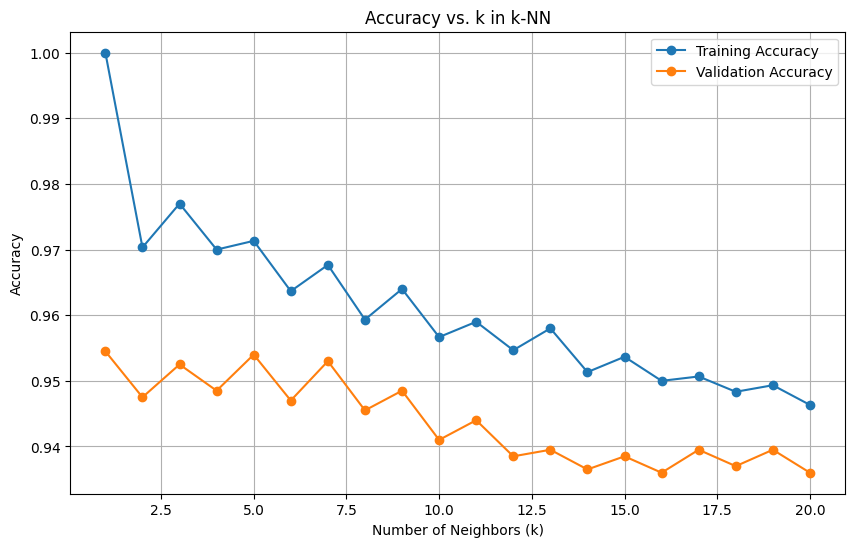

The optimal value of k is: 1


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('UniversalBank.csv')

# Drop ID and ZIP Code as they're not relevant for prediction
data = data.drop(columns=['ID', 'ZIP Code'])

# Convert 'Education' to dummy variables (drop first category to avoid multicollinearity)
data = pd.get_dummies(data, columns=['Education'], drop_first=True)

# Define features (X) and target (y)
X = data.drop('PersonalLoan', axis=1)
y = data['PersonalLoan']

# Split the data into 60% training and 40% validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=1)

# Standardize the features (important for k-NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Try different values of k
k_values = range(1, 21)
train_accuracies = []
valid_accuracies = []

for k in k_values:
    # Initialize k-NN with the current k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train_scaled, y_train)

    # Predict on the training and validation sets
    y_train_pred = knn.predict(X_train_scaled)
    y_valid_pred = knn.predict(X_valid_scaled)

    # Compute accuracy for both training and validation sets
    train_acc = accuracy_score(y_train, y_train_pred)
    valid_acc = accuracy_score(y_valid, y_valid_pred)

    # Store the accuracies
    train_accuracies.append(train_acc)
    valid_accuracies.append(valid_acc)

# Plot the accuracies for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(k_values, valid_accuracies, label='Validation Accuracy', marker='o')
plt.title('Accuracy vs. k in k-NN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Find the optimal k (the one with the highest validation accuracy)
best_k = k_values[valid_accuracies.index(max(valid_accuracies))]
print(f"The optimal value of k is: {best_k}")


#Part c

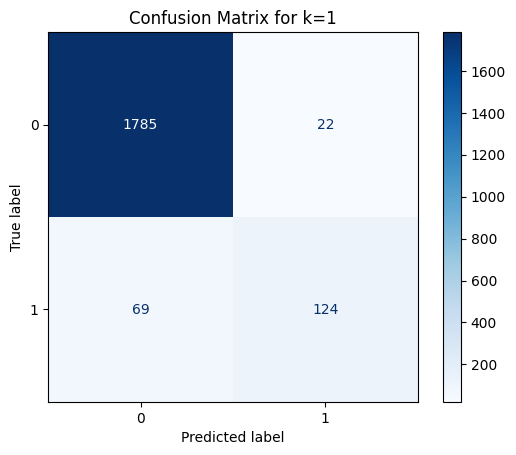

In [14]:
# Import necessary libraries for confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Train the k-NN model using the best k (in this case k=1)
knn_best = KNeighborsClassifier(n_neighbors=1)
knn_best.fit(X_train_scaled, y_train)

# Step 2: Make predictions on the validation data
y_valid_pred = knn_best.predict(X_valid_scaled)

# Step 3: Generate and display the confusion matrix
cm = confusion_matrix(y_valid, y_valid_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_best.classes_)

# Plot the confusion matrix
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix for k=1')
plt.show()


#Part d

In [16]:
# Given customer details for classification
new_customer = pd.DataFrame({
    'Age': [40],
    'Experience': [10],
    'Income': [84],
    'Family': [2],
    'CCAvg': [2],
    'Mortgage': [0],
    'SecuritiesAccount': [0],
    'CDAccount': [0],
    'Online': [1],
    'CreditCard': [1],
    'Education_2': [1],  # Education_2 corresponds to Education level 2
    'Education_3': [0]   # Education_3 corresponds to Education level 3
    # Education_1 is omitted since drop_first=True in pd.get_dummies() during training
})

# Ensure the new customer's columns match those in X_train
# If the training data had any other dummy variables, ensure they are handled here

# Standardize the new customer features using the scaler fitted on the training data
new_customer_scaled = scaler.transform(new_customer)

# Classify the new customer using the best k-NN model
new_customer_prediction = knn_best.predict(new_customer_scaled)

# Output the classification result
print(f"New Customer Classification (k={best_k}): {new_customer_prediction[0]}")


New Customer Classification (k=1): 0


#Part e

In [17]:
# Step 1: Repartition the data into training (50%), validation (30%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=1)  # 50% training, 50% temp
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=1)  # 30% valid, 20% test

# Step 2: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train the k-NN model with the best k (previously determined)
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

# Step 4: Predict on the validation and test sets
y_valid_pred = knn_best.predict(X_valid_scaled)
y_test_pred = knn_best.predict(X_test_scaled)

# Step 5: Calculate confusion matrices
confusion_matrix_valid = confusion_matrix(y_valid, y_valid_pred)
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

# Display confusion matrices
print("Confusion Matrix for Validation Set:")
print(confusion_matrix_valid)
print("\nConfusion Matrix for Test Set:")
print(confusion_matrix_test)


Confusion Matrix for Validation Set:
[[1333   16]
 [  52   99]]

Confusion Matrix for Test Set:
[[897  15]
 [ 28  60]]


#7.3

#part a

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Step 1: Load the dataset
data = pd.read_csv('BostonHousing.csv')

# Step 2: Define predictors and target
X = data.iloc[:, :-1]  # First 12 columns as predictors
y = data['MEDV']        # Target column

# Step 3: Normalize the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 4: Split data into 60% training and 40% validation
X_train, X_valid, y_train, y_valid = train_test_split(X_normalized, y, test_size=0.4, random_state=1)

# Step 5: Perform k-NN for k from 1 to 5 and evaluate performance
k_values = range(1, 6)
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_valid)
    mse = mean_squared_error(y_valid, y_pred)
    mse_values.append(mse)

# Find the best k
best_k = k_values[mse_values.index(min(mse_values))]
best_mse = min(mse_values)

# Output the results
print("Mean Squared Errors for k values:", mse_values)
print("Best k:", best_k)
print("Best Mean Squared Error:", best_mse)


Mean Squared Errors for k values: [9.427980295566503, 9.24899014778325, 10.20253968253968, 11.48596674876847, 12.920331034482757]
Best k: 2
Best Mean Squared Error: 9.24899014778325


#Part b

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# Load the dataset
data = pd.read_csv('BostonHousing.csv')

# Select features and target variable
X = data.iloc[:, :-1]  # First 12 columns
y = data['MEDV']  # Target variable

# Partition the data into training (60%) and validation (40%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Use k=2 from previous analysis (you can adjust this if needed)
best_k = 2

# Train k-NN model with best k
knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

# Part B: Predict MEDV for a specific tract using the best k
new_tract_data = {
    'CRIM': 0.2,
    'ZN': 0,
    'INDUS': 7,
    'CHAS': 0,
    'NOX': 0.538,
    'RM': 6,
    'AGE': 62,
    'DIS': 4.7,
    'RAD': 4,
    'TAX': 307,
    'PTRATIO': 21,
    'LSTAT': 10
}

# Create DataFrame for new tract
new_tract = pd.DataFrame(new_tract_data, index=[0])

# Ensure the new tract has the same feature columns as X_train
new_tract = new_tract.reindex(columns=X_train.columns, fill_value=0)

# Normalize the new tract data
new_tract_scaled = scaler.transform(new_tract)

# Predict MEDV using the best k
predicted_medv = knn_best.predict(new_tract_scaled)

# Output the result
print("Predicted MEDV for the new tract:", predicted_medv[0])


Predicted MEDV for the new tract: 15.05


#Part c

In [27]:
from sklearn.metrics import mean_squared_error

# Predict MEDV for the training set
y_train_pred = knn_best.predict(X_train_scaled)

# Calculate Mean Squared Error (MSE) for the training set
training_error = mean_squared_error(y_train, y_train_pred)

# Output the training error
print("Mean Squared Error of the training set:", training_error)


Mean Squared Error of the training set: 2.6715264026402634


#Part d

The validation data error can appear overly optimistic compared to the error rate when applying the k-NN predictor to new data for several reasons:

Overfitting:

The k-NN algorithm can memorize the training data, especially with a small value of k. This means it might perform very well on the training and validation sets but not generalize well to unseen data.

Data Leakage:

If any information from the test set unintentionally influences the model during training or validation, it can lead to overly optimistic performance metrics.

Small Sample Size:

Validation datasets are typically smaller than the training dataset. If the validation set does not adequately represent the overall data distribution, the model may seem to perform better than it actually would on a larger, more representative dataset.

Variability:

The specific samples chosen for the validation set can lead to variability in performance. If the validation set happens to include easier cases, the model’s performance will be skewed positively.

Choice of Metrics:

Different metrics (e.g., MSE, accuracy) can lead to different interpretations of performance. Relying solely on validation metrics can be misleading without considering how the model will perform on truly unseen data.

Simplistic Assumptions:

The k-NN algorithm assumes that similar instances are close in the feature space. If the training and validation datasets have different underlying distributions or characteristics, this assumption may not hold true for new data.

#Part e

Using k-NN prediction for predicting MEDV for several thousand new tracts has several disadvantages:

Disadvantages of k-NN Prediction:

Computational Complexity:

k-NN is a lazy learning algorithm, meaning it doesn't build a model during training. Instead, it stores the entire training dataset. For each new prediction, it must compute distances to all training examples, leading to high computational costs, especially with large datasets.

Memory Usage:

Since k-NN stores the entire dataset, it can consume a significant amount of memory, which may be impractical for very large datasets.

Prediction Time:

The time taken to make predictions can be quite slow, as it requires comparing the new instance with all training instances.

Sensitivity to Irrelevant Features:

k-NN can be affected by irrelevant features and noise in the data, leading to poorer predictions if the dataset contains many features that do not contribute to the target variable.

Curse of Dimensionality:

As the number of features increases, the distance between points becomes less meaningful. This can degrade the performance of k-NN in high-dimensional spaces.

Data Imbalance:

If the training dataset is imbalanced (e.g., more examples of one class than another), k-NN may be biased towards the majority class, affecting prediction accuracy.
Operations of k-NN for Each Prediction:

Receive Input:

The algorithm receives the feature vector of the new tract.

Calculate Distances:

Compute the distance (e.g., Euclidean distance) between the new tract and all points in the training dataset.

Sort Distances:

Sort the calculated distances in ascending order to identify the closest neighbors.

Select Neighbors:

Choose the k nearest neighbors based on the sorted distances.

Aggregate Predictions:

For regression tasks like predicting MEDV, average the values of the k nearest neighbors to produce the final prediction.

Return Prediction:

Output the predicted value for the new tract based on the aggregated results from the nearest neighbors.